In [1]:
import gdown

url = 'https://drive.google.com/uc?id=1JKnvWEFRjvd-6HNpcQZRg5OJ1QEulc35'
output = 'ds_xray.zip'
gdown.download(url, output, quiet=False)

import zipfile
import os

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('ds_xray')

print("Dataset descargado y descomprimido en la carpeta 'ds_xray/'")

Downloading...
From (original): https://drive.google.com/uc?id=1JKnvWEFRjvd-6HNpcQZRg5OJ1QEulc35
From (redirected): https://drive.google.com/uc?id=1JKnvWEFRjvd-6HNpcQZRg5OJ1QEulc35&confirm=t&uuid=4b28b639-f741-4373-ac3e-de92684d0651
To: c:\Users\USUARIO\OneDrive\Documentos\vpcII_carreras_fajardo_mas\ds_xray.zip
100%|██████████| 140M/140M [00:12<00:00, 11.5MB/s] 


Dataset descargado y descomprimido en la carpeta 'ds_xray/'


In [2]:
import os

base_dir = os.path.join(os.getcwd(), "ds_xray")

for split in ['train', 'valid', 'test']:
    img_dir = os.path.join(base_dir, split, 'images')
    n_imgs = len([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
    print(f"{split}: {n_imgs} imágenes")

train: 6181 imágenes
valid: 1766 imágenes
test: 883 imágenes


In [3]:
from collections import Counter
import glob

label_files = glob.glob(os.path.join(base_dir, '**', 'labels', '*.txt'), recursive=True)
clases = Counter()

for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            clase = line.strip().split()[0]  # la clase está en la 1ra columna
            clases[clase] += 1

print("Distribución de clases:")
for k, v in sorted(clases.items()):
    print(f"Clase {k}: {v} instancias")

Distribución de clases:
Clase 0: 1841 instancias
Clase 1: 1975 instancias
Clase 2: 1041 instancias
Clase 3: 1948 instancias
Clase 4: 2025 instancias


In [4]:
import yaml
import os

yaml_path = os.path.join(os.getcwd(), "ds_xray", "data.yaml")

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

print("Significado de cada clase:")
for i, name in enumerate(data['names']):
    print(f"Clase {i}: {name}")

Significado de cada clase:
Clase 0: 0
Clase 1: 1
Clase 2: 2
Clase 3: 3
Clase 4: 4


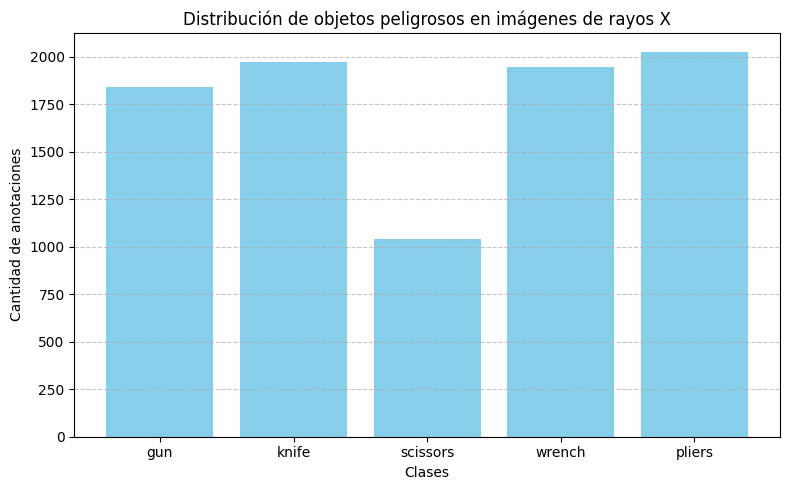

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import glob
import os

# Ruta al dataset
base_dir = os.path.join(os.getcwd(), "ds_xray")

# Nombres reales de las clases según data.yaml de Roboflow
nombres_clases = ['gun', 'knife', 'scissors', 'wrench', 'pliers']

# Contar clases en todos los .txt
label_files = glob.glob(os.path.join(base_dir, '**', 'labels', '*.txt'), recursive=True)
clase_counter = Counter()

for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            if line.strip():
                clase = int(line.strip().split()[0])
                clase_counter[clase] += 1

# Generar listas automáticamente con nombres
clases = [nombres_clases[c] for c in sorted(clase_counter.keys())]
cantidades = [clase_counter[c] for c in sorted(clase_counter.keys())]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(clases, cantidades, color='skyblue')
plt.xlabel("Clases")
plt.ylabel("Cantidad de anotaciones")
plt.title("Distribución de objetos peligrosos en imágenes de rayos X")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()